<a href="https://colab.research.google.com/github/ganeshap1995/Bharatintern/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

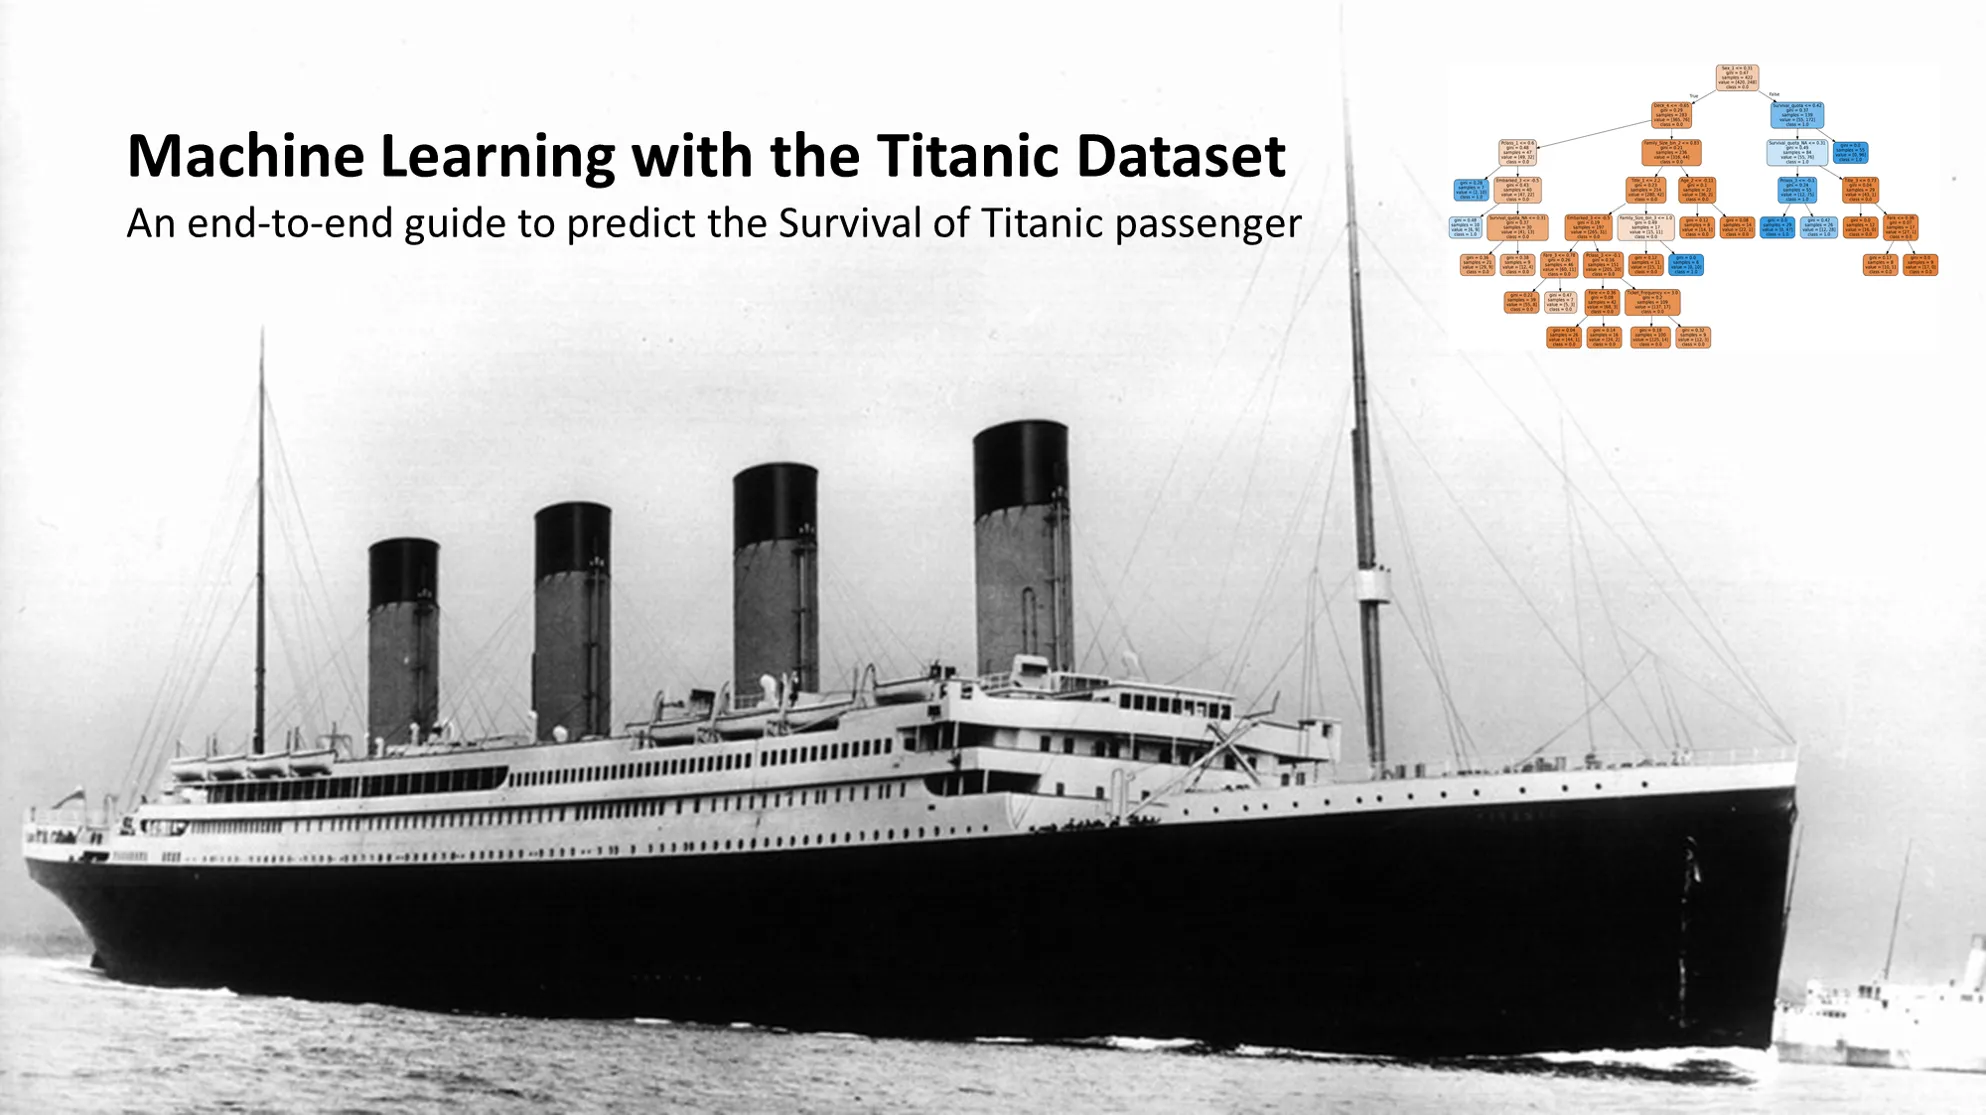

#**Title:** "Titanic Classification."

#**Problem Statement:**
###Develop a system to predict survival during sinking incidents based on factors like socio-economic status, age, and gender. Collect relevant data, train a machine learning model, and evaluate its accuracy.

#**Algorithms used:**
1.DecisionTreeClassifier

2.LogosticRegression

3.SupportVectorClassification

4.RandomForestClassifier

5.GradientBoostingClassifier

6.AdaBoostClassifier

#**Balancing method used:**
###SMOTE ( Synthetic Minority Oversampling Technique)

###Importing Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###Importing dataset:

In [3]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/titanic.csv')

#Knowing the data.

##**VARIABLE DESCRIPTIONS**

**PassengerID:** ID of passenger

**survival:** Survival (0 = No; 1 = Yes)

**Pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

**name:** Name

**sex:** Sex

**age:** Age

**sibsp:** Number of Siblings/Spouses Aboard

**parch:** Number of Parents/Children Aboard

**ticket:** Ticket Number

**fare:** Passenger Fare (British pound)

**cabin:** Cabin

embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


###Firstlook of data:

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Data information:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###Data description:

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Shape of data:

In [6]:
df.shape

(891, 12)

#Data Wrangling and EDA part.

###Checking dulplicates:

In [7]:
df.duplicated().sum()

0

There is no duplicate present in our data.

###Checking the null values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are some null values. We need to handle them for proper model building.

In [9]:
# Dropping Cabin column as there are 687 null out of 891 entries.
df.drop('Cabin',axis=1,inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

I am dropping all null values from Embarked column as it is categorical column.

Also I am dropping all nulls from age because if I impute with mean or median then it will create biasness in data.

In [11]:
df.dropna(inplace=True)

###Checking nulls after taking necessary action.

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we can see there is no null value in our dataset.

###New shape of data.

In [13]:
df.shape

(712, 11)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
# Checking unique values in Embarked column as it helps us in decision to do One Hot Encoding for this or not.
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

###Converting Categorical columns into Numerical columns using One Hot Encoding.

In [16]:
# Doing One Hot Encoding
new_df=pd.get_dummies(df,columns=['Sex','Embarked'])

###New data after encoding.

In [17]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


###Dropping unnecessary columns.

In [18]:
new_df.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

###New data ready for model building:

In [19]:
new_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


###Unique values from each feature

In [20]:
pd.Series({col: df[col].unique() for col in df})

PassengerId    [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, 54.0, 2.0, 27.0, 14.0...
SibSp                                         [1, 0, 3, 4, 2, 5]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 51.8625, 21...
Embarked                                               [S, C, Q]
dtype: object

###Changing datatype of Age column.

In [21]:
# Unique values from Age
import sys
sys.setrecursionlimit(5000000)
age_u=[new_df['Age'].unique()]
age_u

[array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
        58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
        19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
        29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
        25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
        37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
        55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
        20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
        10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
        24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])]

We can see some discrepency in this column as some ages are like 0.83, 0.92 0.67 etc.

we need to take some actioon on this!

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Fare        712 non-null    float64
 6   Sex_female  712 non-null    uint8  
 7   Sex_male    712 non-null    uint8  
 8   Embarked_C  712 non-null    uint8  
 9   Embarked_Q  712 non-null    uint8  
 10  Embarked_S  712 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 42.4 KB


The datatype of Age column is float64 and from unique values also we can see some ages are like 0.83. So by doing some actions we have to convert datatpe of Age from float into interger.

###Rounding Off values in Age.

In [23]:
'''
This function will roundoff the age to nearest complete integer.
'''
def age_roundoff(age):
  x=round(age)
  return x


In [24]:
# Applying labda function for modifing values
new_df['Age']=new_df['Age'].apply(lambda age:age_roundoff(age) )

###New datatype:

In [25]:
new_df['Age'].dtype

dtype('int64')

### Unique values after modification.

In [26]:
new_df['Age'].unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15, 28,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  1, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       56, 44, 61, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80,
        6,  0, 74])

Now there is no any discrepency.

#Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

##1. Survival status of Passengers.

In [27]:
a=new_df.groupby('Survived',as_index=False)['Age'].count()

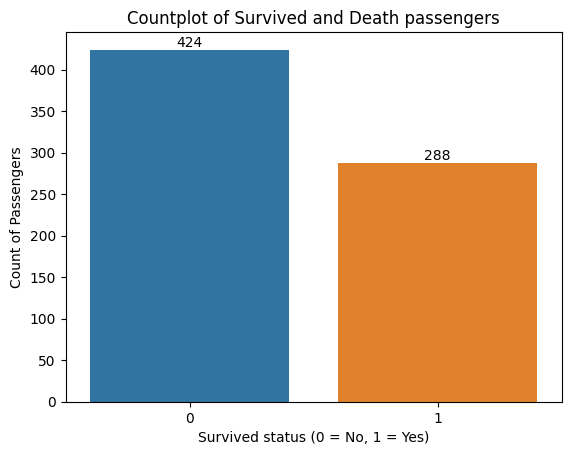

In [28]:
ax=sns.barplot(data=a,x='Survived',y='Age')

plt.title('Countplot of Survived and Death passengers')
plt.xlabel('Survived status (0 = No, 1 = Yes)')
plt.ylabel('Count of Passengers')
for i in ax.containers:
  ax.bar_label(i)

In this dataset 'Survived status' is dependent feature. We can see data imbalance as count of survived is 288 and death is 424.

Before Counter({1: 341, 0: 341})
After Counter({1: 341, 0: 341})


##2. Boxplot of AGE:

<Axes: >

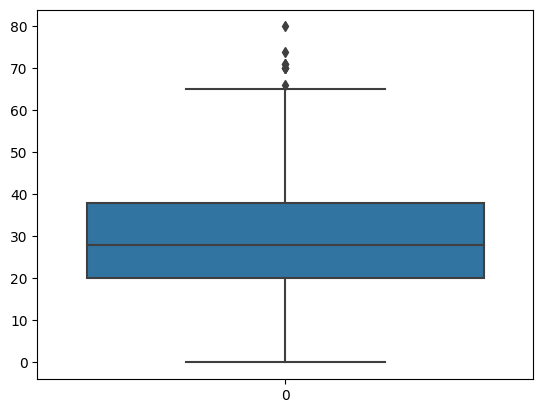

In [29]:
sns.boxplot(new_df['Age'])

Boxplot shows there are some outliers exist in the Age column.

In [30]:
new_df['Age'].kurtosis()

0.18538320531809394

Kurtosis value for Age column is 0.1879, which below than 3, it means outliers won't affect on data.In simpler terms, the dataset or distribution has fewer extreme values and a relatively lower peak than a normal distribution.

##3.Distribution plot for Age.

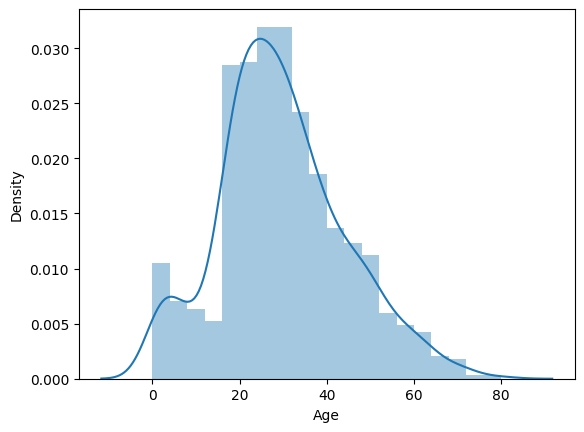

In [31]:
sns.distplot(new_df['Age'])
plt.show()

##4.Countplot of Passenger (genderwise).

In [32]:
df.groupby('Sex')['Age'].count()

Sex
female    259
male      453
Name: Age, dtype: int64

In [33]:
b=df.groupby(['Sex'],as_index=False)['Age'].count()
b

,Sex,Age
0,female,259
1,male,453


Text(0.5, 0, 'Count of Passengers')

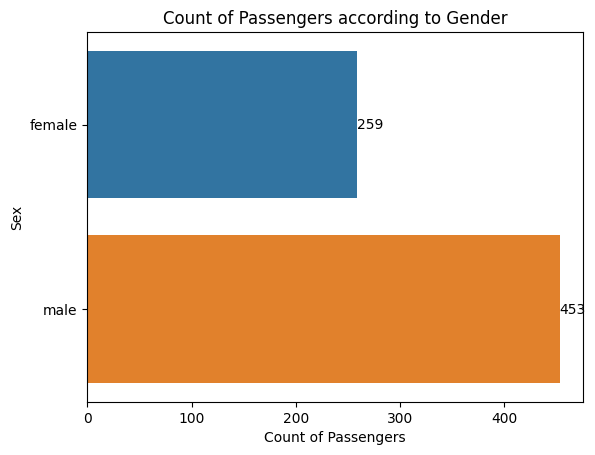

In [34]:
bx=sns.barplot(data=b,x='Age',y='Sex')

for i in bx.containers:
  bx.bar_label(i)

plt.title('Count of Passengers according to Gender')
plt.xlabel('Count of Passengers')

Male passengers are more than female passengers.

##5.Heatmap

<Axes: >

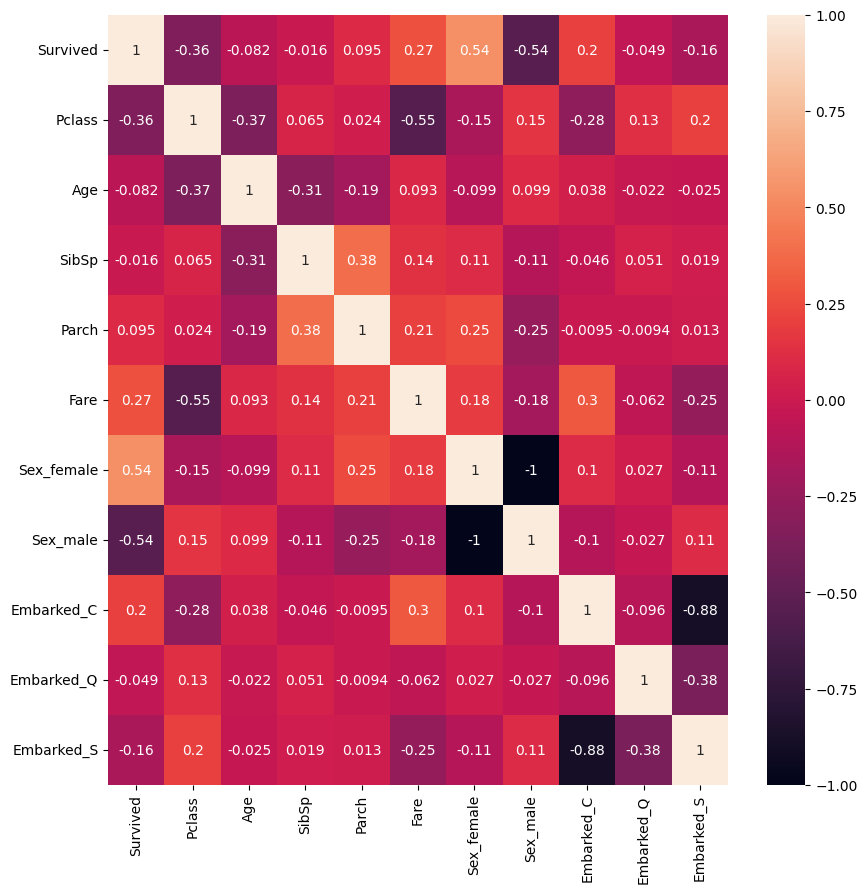

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),annot=True)

##6.Pairplot.

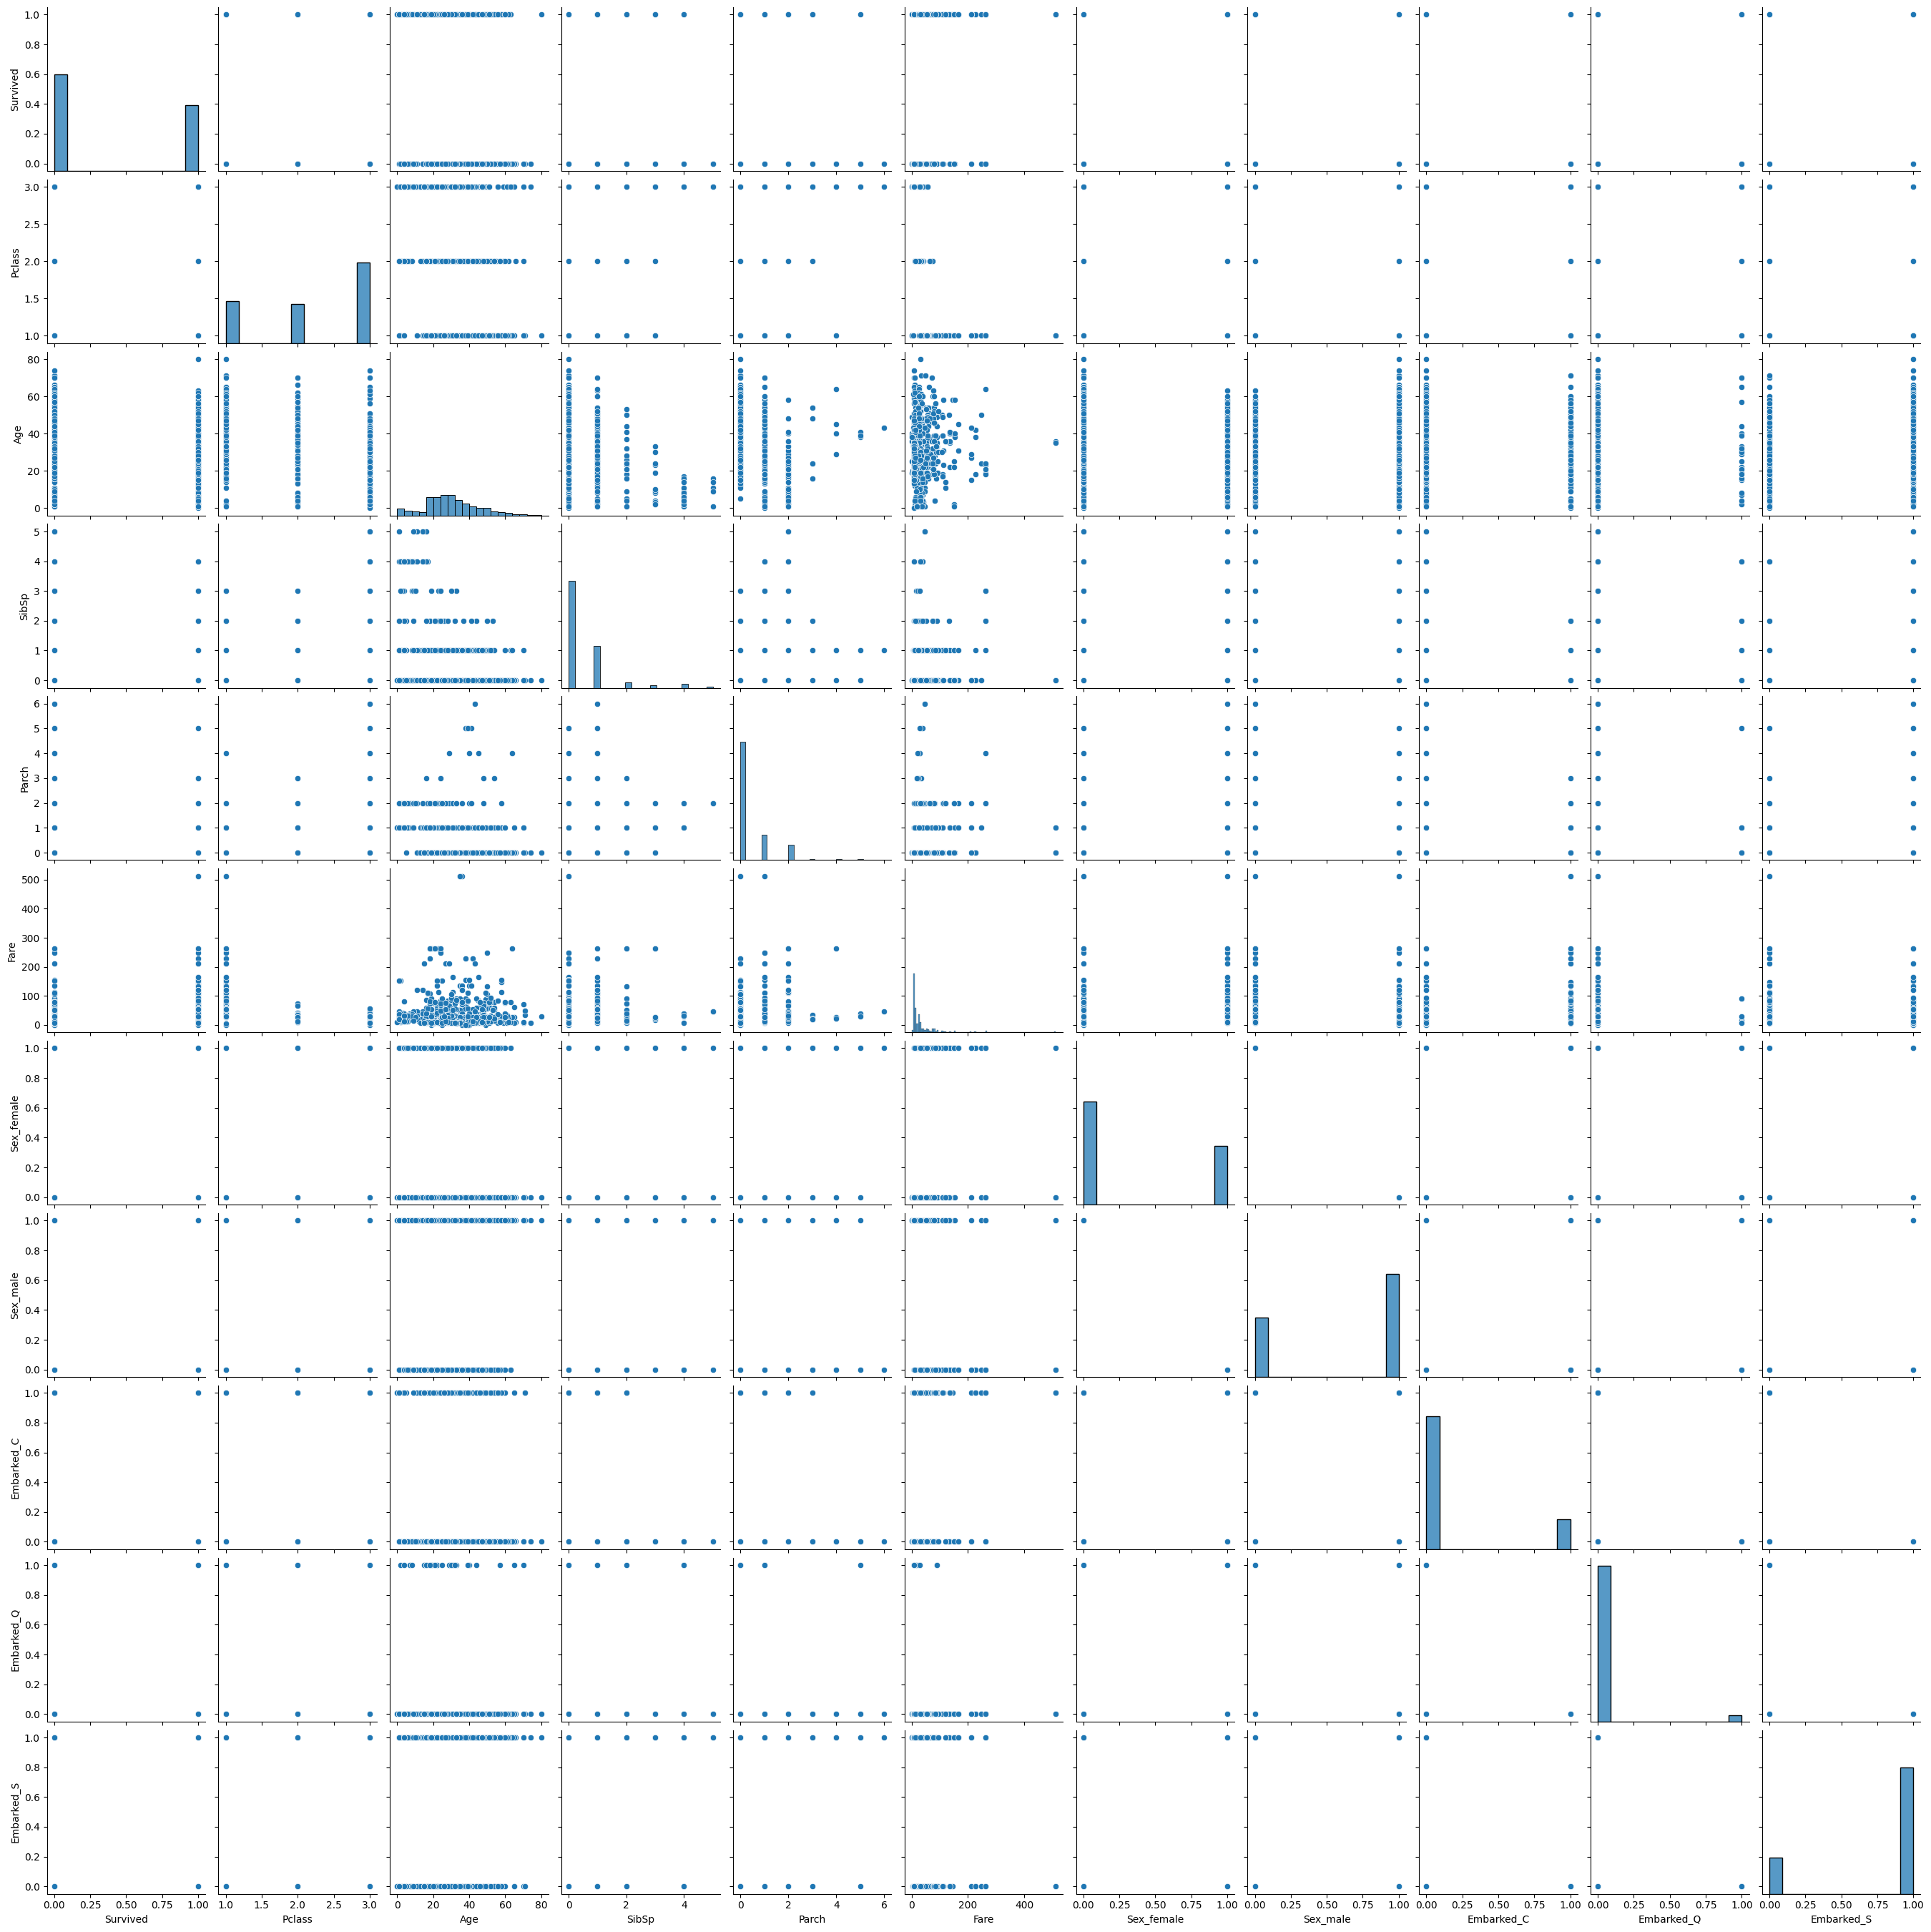

In [36]:
sns.pairplot(new_df)

#Feature Engineering & Data Pre-processing

In [37]:
# Our data set
new_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1


###Creating dataset according to dependent and independent variable.

In [38]:
X=new_df.iloc[:,1:]
y=new_df.iloc[:,0]

###Train_test split of data.

In [39]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [155]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)


X_train (569, 10)
X_test (143, 10)
y_train (569,)
y_test (143,)


##Data balancing:

In [156]:
from collections import Counter

counter =Counter(y_train)
print(f'Before {counter}')

Before Counter({0: 341, 1: 228})


The data is highly imbalanced as the count of the dependent variable in the "not survived" status is 341, while in the "survived" status it is 228.

In [157]:
# For data balancing I am using SMOTE (Synthetic Minority Oversampling Technique ) technique
from imblearn.over_sampling import SMOTE

smt=SMOTE()
X_train,y_train=smt.fit_resample(X_train,y_train)
counter=Counter(y_train_sm)
print(f'After {counter}')

After Counter({1: 341, 0: 341})


Now data is balanced and ready to use for model building.

#ML Model Implementation

##Model 1: Decision Tree Classifier:-

###First cut of Decision Tree Classifier( Without hyperparameter tuning).

In [42]:
# Importing classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [43]:
classifier=DecisionTreeClassifier()

In [44]:
# Fitting data in model
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

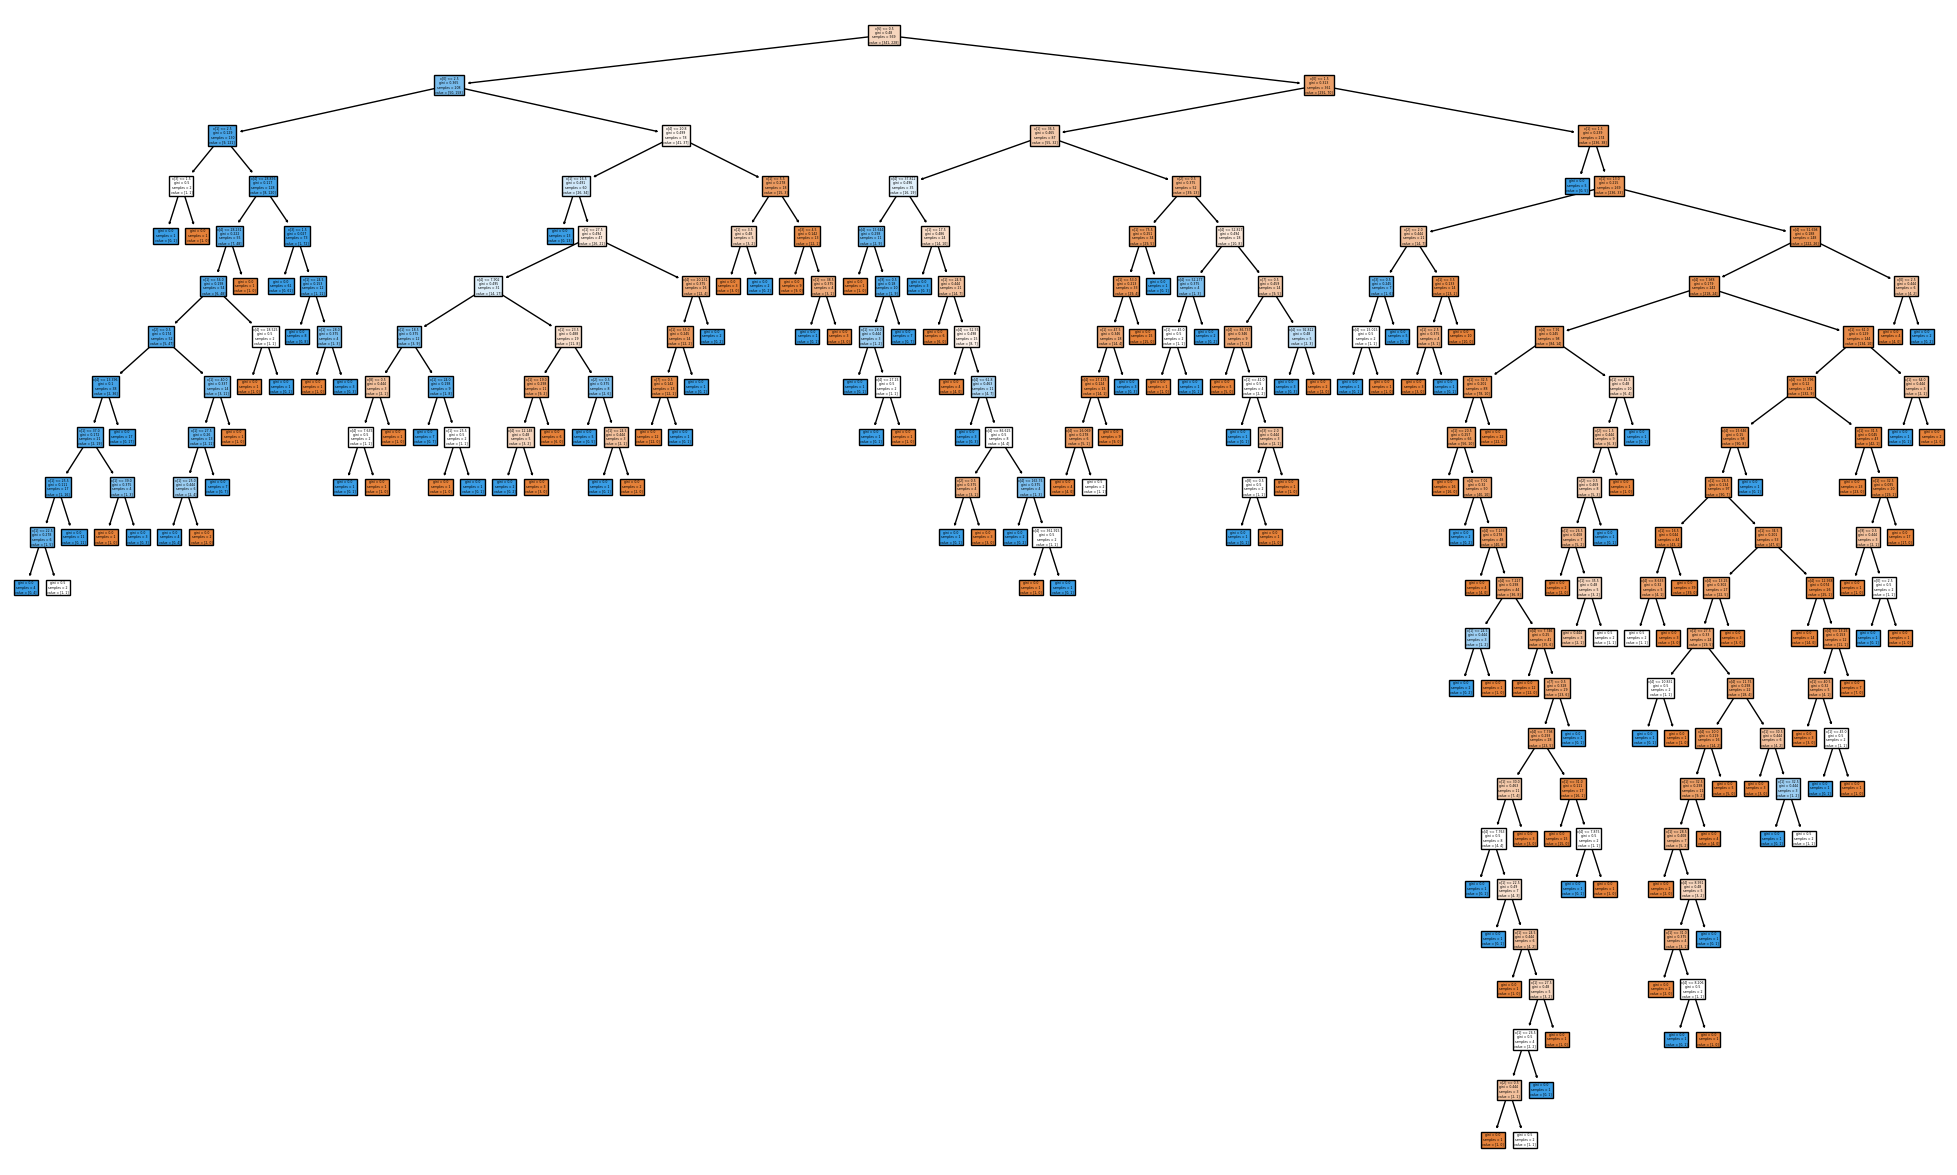

In [45]:
# Plotting the decision tree
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(classifier,filled=True)
plt.show()

In [46]:
# Predicting the value
y_train_pred=classifier.predict(X_train)

In [47]:
# Calculating the accuracy score for train data
score_train=accuracy_score(y_train,y_train_pred)
print(f'The accuray score for train data is {score_train}')

The accuray score for train data is 0.9876977152899824


In [48]:
# Classification report for train data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       341
           1       1.00      0.97      0.98       228

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.99       569
weighted avg       0.99      0.99      0.99       569



In [49]:
# Predicting for test data
y_test_pred=classifier.predict(X_test)

In [50]:
# Accuracy score for test data
score_test=accuracy_score(y_test,y_test_pred)
print(f'The accuray score for train data is {score_test}')

The accuray score for train data is 0.7482517482517482


As the train accuracy is very high ie. 0.99 and test accuracy is low ie. 0.75
This shows that model is overfitting. For better performance of model I am performing Hyperparamter tuning using GridSearchCV.

###Decision tree classifier with hyperparameter tuning

In [51]:
# Using GridSearch Cross validation for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [52]:
# Declaring the parameters
parameters={'criterion':['gini', 'entropy', 'log_loss'],
            'splitter':['best', 'random'],
            'min_samples_split': [0,1,2,3,5,7,9,10],
            'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15],
            'min_samples_leaf':[0,1,2,3,4,5,6,7,8,9,10,12,15],
            'max_features':['auto', 'sqrt', 'log2']}

In [53]:
dtcv=GridSearchCV(classifier,parameters,cv=5,scoring='accuracy')

In [54]:
# Fitting data in model
dtcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              12, 15],
                         'min_samples_split': [0, 1, 2, 3, 5, 7, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
# Best parameters choosen by Grid Search CV
dtcv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [56]:
# Best score
dtcv.best_score_

0.8347461574289706

In [57]:
# Prediciting the y_train
y_train_pred_hpt=dtcv.predict(X_train)

In [58]:
# Accuracy score for train data
score_train=accuracy_score(y_train,y_train_pred_hpt)
print(f'The accuray score for train data is {score_train}')

The accuray score for train data is 0.836555360281195


In [59]:
# Prediciting the y_test
y_test_pred_hpt=dtcv.predict(X_test)

In [60]:
# Accuracy score for test data
score_test=accuracy_score(y_test,y_test_pred_hpt)
print(f'The accuray score for test data is {score_test}')

The accuray score for test data is 0.7482517482517482


After hyperparameter tuning train accuracy coming as 0.84 and test accuracy as 0.75

##Model 2 :Logistic Regression

###First cut (Without hyper parameter tuning)

In [61]:
# Importing Logistic regression
from sklearn.linear_model import LogisticRegression

In [62]:
Lreg=LogisticRegression()

In [63]:
# Fitting the data in model
Lreg.fit(X_train,y_train)

LogisticRegression()

In [64]:
# Prediction for train data
y_train_pred_lreg=Lreg.predict(X_train)

In [65]:
# Accuracy score for train data

print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_lreg)}')

Accuracy score for train data 0.8154657293497364


In [66]:
# Prediction for test data
y_test_pred_lreg=Lreg.predict(X_test)

In [67]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_lreg)}')

Accuracy score for test data 0.7762237762237763


Train and test accuracy score is 0.82 and 0.78 respectively. Model is not overfitting but it is showing less accuracy so let us do hyperparameter tuning.

###With Hyperparameter Tuning

In [68]:
parameters={'penalty':['l1', 'l2','elasticnet'],
            'C':[1.0,2.0,3.0,4.0,5.0],
            'max_iter':[100,200,300,500,1000]
            }

In [69]:
lregcv=GridSearchCV(Lreg,parameters,cv=5,scoring='accuracy')

In [70]:
# Fitting data in model
lregcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [71]:
# Best parameters after hyperparameter tuning
lregcv.best_params_

{'C': 5.0, 'max_iter': 100, 'penalty': 'l2'}

In [72]:
# Best score after hyperparameter tuning
lregcv.best_score_

0.8067225586089117

In [73]:
# Prediction for train data
y_train_pred_lregcv=lregcv.predict(X_train)

In [74]:

# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_lregcv)}')

Accuracy score for train data 0.81195079086116


In [75]:
# Prediction for train data
y_test_pred_lregcv=lregcv.predict(X_test)

In [76]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_lregcv)}')

Accuracy score for test data 0.7692307692307693


After hyperparameter tuning train and test acuuracy coming 0.82 and 0.77 resp. It shows after hyperparameter also accuarcy is not much improved.

##Model 3: Support Vector Classifier

###First cut (without hyperparameter tuning).

In [77]:
# Importing Support Vector Classifier
from sklearn.svm import SVC

In [78]:
svc=SVC()

In [79]:
#Fitting data in model
svc.fit(X_train,y_train)

SVC()

In [80]:
# Prediction for train data
y_train_pred_svc=svc.predict(X_train)

In [81]:
# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_svc)}')

Accuracy score for train data 0.6766256590509666


In [82]:
# Prediction for test data
y_test_pred_svc=svc.predict(X_test)

In [83]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_svc)}')

Accuracy score for test data 0.6713286713286714


As accuracy of train and test data is 0.68 and 0.68 resp. It means model is not best for this data as accuracy is less as compare to other model.

###With hyperparameter tuning.

In [84]:
parameters={'kernel': ['linear', 'poly','rbf','sigmoid'] ,
            'C':[1.0,2.0,3.0,4.0,5.0]
            }

In [85]:
svccv=GridSearchCV(svc,parameters,cv=5,scoring='accuracy')

In [86]:
# Fitting data in model
svccv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [87]:
# Best parameters after hyperparameter tuning
svccv.best_params_

{'C': 1.0, 'kernel': 'linear'}

In [88]:
# Best score possible after hyperparameter tuning
svccv.best_score_

0.7891165968017388

In [89]:
# Prediction for train data
y_train_pred_svccv=svccv.predict(X_train)

In [90]:
# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_svccv)}')

Accuracy score for train data 0.789103690685413


In [91]:
# Prediction for train data
y_test_pred_svccv=svccv.predict(X_test)

In [92]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_svccv)}')

Accuracy score for test data 0.7412587412587412


Accuracy score after hyperparameter tuning is 0.78 and 0.75 for train and test data resp. It is good than previous model.

##Model 4:Random Forest Classifier


###First cut (Without hyperparamter tuning).

In [93]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc=RandomForestClassifier()

In [95]:
# Fitting the data into model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
# Prediction for train data
y_train_pred_rfc=rfc.predict(X_train)

In [97]:
# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_rfc)}')

Accuracy score for train data 0.9859402460456942


In [98]:
# Prediction for train data
y_test_pred_rfc=rfc.predict(X_test)

In [99]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_rfc)}')

Accuracy score for test data 0.7832167832167832


Train and test accuracy is coming as 0.99 and 0.78 resp. This shows that model is overfitting. So let us do hyperparameter tuning.

###With hyperparameter tuning

In [100]:
# Declaring the parameters
parameters={'criterion':['gini', 'entropy', 'log_loss'],
            'n_estimators':[100,200,400,500,1000],
            'min_samples_split': [3,4,5,7],
            'max_depth':[5,6,7,8,9,10],
            'min_samples_leaf':[5,6,7,8,9],
            'max_features':['sqrt', 'log2']}

In [101]:
# Setting parameters in model
rfc1=RandomForestClassifier(criterion= 'entropy',
 max_depth= 7,
 max_features= 'log2',
 min_samples_leaf= 5,
 min_samples_split= 7,
 n_estimators=100)

In [102]:
# Fitting the data in model
rfc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=5, min_samples_split=7)

In [103]:
# Prediction for train data
y_train_pred_rfc1=rfc1.predict(X_train)

In [104]:
# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_rfc1)}')

Accuracy score for train data 0.859402460456942


In [105]:
# Prediction for test data
y_test_pred_rfc1=rfc1.predict(X_test)

In [106]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_rfc1)}')


Accuracy score for test data 0.7832167832167832


After hyperparameter tuning train and test accuracy coming as 0.86 and 0.78 resp.

##Model 5: GradientBoostingClassifier

###First cut (Without hyperparameter tuning)

In [107]:
# Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
gbc=GradientBoostingClassifier()

In [109]:
# Fitting the data in model
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [110]:
# Prediction for train data
y_train_pred_gbc=gbc.predict(X_train)

In [111]:
# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train_pred_gbc,y_train)}')

Accuracy score for train data 0.9191564147627417


In [112]:
# Prediction for test data
y_test_pred_gbc=gbc.predict(X_test)

In [113]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test_pred_gbc,y_test)}')

Accuracy score for test data 0.8181818181818182


As train and test accuracy is 0.92 and 0.82 for model this shows the model is overfitting.

###With hyperparameter tuning

In [114]:
parameters={'loss':['log_loss', 'deviance', 'exponential'],
           'n_estimators':[100,200,500,1000],
           'criterion':['friedman_mse','squared_error'],
           'max_features':['auto', 'sqrt', 'log2']         }

In [115]:
gbcv=GridSearchCV(gbc,parameters,cv=5,scoring='accuracy')

In [116]:
# Fitting the data in model
gbcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy')

In [117]:
# Best parameters after hyperparameter tuning
gbcv.best_params_

{'criterion': 'squared_error',
 'loss': 'deviance',
 'max_features': 'log2',
 'n_estimators': 100}

In [118]:
# Best score after hyperparameter tuning
gbcv.best_score_

0.8313771153547584

In [119]:
# Prediction for train data
y_train_pred_gbcv=gbcv.predict(X_train)

In [120]:
# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train_pred_gbcv,y_train)}')


Accuracy score for train data 0.8892794376098418


In [121]:
# Prediction for test data
y_test_pred_gbcv=gbcv.predict(X_test)

In [122]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test_pred_gbcv,y_test)}')

Accuracy score for test data 0.8181818181818182


##Model 6 :AdaBoostClassifier

In [141]:
# Importing AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [142]:
abc=AdaBoostClassifier()

In [143]:
# Fitting the data in model
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [144]:
# Prediction for train data
y_train_pred_abc=abc.predict(X_train)

In [145]:
# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train_pred_abc,y_train)}')

Accuracy score for train data 0.859402460456942


In [146]:
# Prediction for test data
y_test_pred_abc=abc.predict(X_test)

In [147]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test_pred_abc,y_test)}')

Accuracy score for test data 0.7902097902097902


#Conclusion:

In [5]:
Model=['DecisionTreeClassifier','DecisionTreeClassifier with CV','LogisticRegression','LogisticRegression with CV','SupportVectorClassification',
       'SupportVectorClassification with CV','RandomForestClassifier','RandomForestClassifier with CV','GradientBoostingClassifier',
       'GradientBoostingClassifier with CV','AdaBoostClassifier']

In [10]:
Train_accuracy=[0.98,0.85,0.82,0.81,0.68,0.79,0.99,0.86,0.92,0.89,0.86]

In [11]:
Test_accuracy=[0.75,0.75,0.78,0.77,0.68,0.75,0.78,0.78,0.81,0.81,0.79]

In [12]:
Model_accuracy=zip(Model,Train_accuracy,Test_accuracy)

In [13]:
pd.DataFrame(Model_accuracy)

,0,1,2
0,DecisionTreeClassifier,0.98,0.75
1,DecisionTreeClassifier with CV,0.85,0.75
2,LogisticRegression,0.82,0.78
3,LogisticRegression with CV,0.81,0.77
4,SupportVectorClassification,0.68,0.68
5,SupportVectorClassification with CV,0.79,0.75
6,RandomForestClassifier,0.99,0.78
7,RandomForestClassifier with CV,0.86,0.78
8,GradientBoostingClassifier,0.92,0.81
9,GradientBoostingClassifier with CV,0.89,0.81


##From above tabel we can conclude that for given dataset after data balancing 'GradientBoostingClassifier' after Hyperparameter tuning giving high accuracy score for train and test dataset.